In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
# 二维卷积，以及二维池化 以及扁平化 
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

/Users/liliangbin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# （6000，28，28，） ==> (60000,28,28,1) 包括一维深度信息
print('x_shpae:',x_train.shape)
print('y_shapr:',y_train.shape)
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)


x_shpae: (60000, 28, 28)
y_shapr: (60000,)


In [3]:
model = Sequential()
# 定义卷积层
model.add(
 Convolution2D(
 input_shape=(28,28,1),
     filters = 32,
     kernel_size=5,
     strides=1,
     padding='same',
     activation='relu'
 )
)
# 第一个池化层

model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same'
))


# 第二个卷积层

model.add(Convolution2D(
    64,5,
    strides=1,
    padding='same',
    activation='relu'
))
model.add(MaxPooling2D(2,2,'same'))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


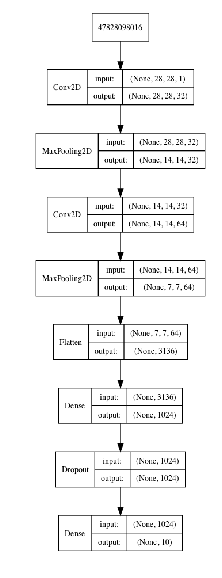

In [4]:
plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img=plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
adam=Adam(lr=1e-4)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=64,epochs=10)
loss,accuracy=model.evaluate(x_test,y_test)
print('\n test loss :',loss)
print('test accuracy: ',accuracy)